In [1]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras import backend as k

In [3]:
#MNIST DATASET
mnist = tf.keras.datasets.mnist

In [4]:
(x_train_full, y_train_full),(x_test_full,y_test_full) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train_full.shape) #Shape of x train
print(y_train_full.shape) #Shape of y train

(60000, 28, 28)
(60000,)


In [6]:
train_filter = np.unique(y_train_full, return_index=True)
print(train_filter)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 1,  3,  5,  7,  2,  0, 13, 15, 17,  4]))


In [7]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
train_filter = np.unique(Y_train, return_index=True)
X_train, Y_train = X_train[train_filter[1:]], Y_train[train_filter[1:]]

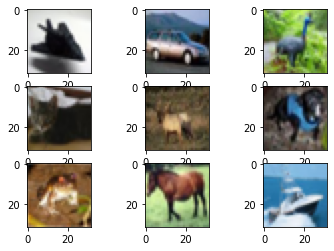

In [48]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [9]:
#Normalizing
x_train_full = x_train_full/255.0
x_test_full = x_test_full/255.0

In [10]:
#Q1
model1 = tf.keras.Sequential()

model1.add(tf.keras.Input(shape=(28,28,1)))
model1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               540900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [11]:
#Q2
model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=(28,28,1)))
model2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
model2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

In [12]:
#Q3
model3 = tf.keras.Sequential()

model3.add(tf.keras.Input(shape=(28,28,1)))
model3.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5),activation="relu",padding="valid"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5),activation="relu",padding="valid"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(120, activation="relu", name="HiddenLayer1"))
model3.add(tf.keras.layers.Dense(84, activation="relu", name="HiddenLayer2"))
model3.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)              

In [13]:
print(x_train_full.shape)
y_train_full.shape

y_train_full[0:10]

(60000, 28, 28)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001), metrics=["accuracy"])

In [15]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(0.001) , metrics=["accuracy"])
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(0.001) , metrics=["accuracy"])
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(0.001) , metrics=["accuracy"])

batch_size = 32
epochs = 15

In [16]:
history = model1.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 18s 3ms/step - loss: 0.1760 - accuracy: 0.9479 - val_loss: 0.0726 - val_accuracy: 0.9805
Epoch 2/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0613 - val_accuracy: 0.9820
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0507 - val_accuracy: 0.9872
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0551 - val_accuracy: 0.9875
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0566 - val_accuracy: 0.9870
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0740 - val_accuracy: 0.9852
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0507 - val_accuracy

In [17]:
history2 = model2.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1307 - accuracy: 0.9605 - val_loss: 0.0517 - val_accuracy: 0.9865
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.0386 - val_accuracy: 0.9897
Epoch 3/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0403 - val_accuracy: 0.9898
Epoch 4/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0396 - val_accuracy: 0.9902
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0420 - val_accuracy: 0.9895
Epoch 6/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0465 - val_accuracy: 0.9910
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0405 - val_accuracy:

In [18]:
history3 = model3.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2069 - accuracy: 0.9361 - val_loss: 0.0888 - val_accuracy: 0.9732
Epoch 2/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0715 - accuracy: 0.9776 - val_loss: 0.0514 - val_accuracy: 0.9848
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.0514 - val_accuracy: 0.9852
Epoch 4/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.0396 - val_accuracy: 0.9880
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 6/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 7/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0493 - val_accuracy:

In [19]:
#Model1
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = model1.predict(x_test_full, len(y_test_full)//batch_size)
y_pred1
y_pred1 = np.argmax(y_pred1, axis=1)
y_pred1

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred1))

Accuracy 0.9878


In [21]:
#Model2
from sklearn.metrics import classification_report, confusion_matrix
y_pred2 = model2.predict(x_test_full, len(y_test_full)//batch_size)
y_pred2
y_pred2 = np.argmax(y_pred2, axis=1)
y_pred2

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred2))

Accuracy 0.9875


In [23]:
#Model3
from sklearn.metrics import classification_report, confusion_matrix
y_pred3 = model3.predict(x_test_full, len(y_test_full)//batch_size)
y_pred3
y_pred3 = np.argmax(y_pred3, axis=1)
y_pred3

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred3))

Accuracy 0.9906


In [25]:
#Dataset 2

cifar = tf.keras.datasets.cifar10

In [26]:
(x_train_full1, y_train_full1),(x_test_full1,y_test_full1) = cifar.load_data() 

170508288/170498071 [==============================] - 6s 0us/step


In [27]:
print(x_train_full1.shape)
print(y_train_full1.shape)

(50000, 32, 32, 3)
(50000, 1)


In [28]:
train_filter = np.unique(y_train_full1, return_index=True)
print(train_filter)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([29,  4,  6,  9,  3, 27,  0,  7,  8,  1]))


In [29]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
train_filter = np.unique(Y_train, return_index=True)
X_train, Y_train = X_train[train_filter[1:]], Y_train[train_filter[1:]]

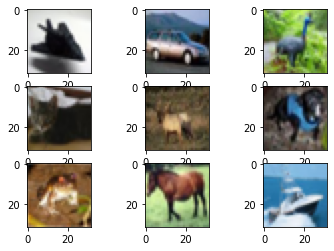

In [30]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [31]:
#Normalizing
x_train_full1 = x_train_full1/255.0
x_test_full1 = x_test_full1/255.0

In [32]:
#Q1
model1 = tf.keras.Sequential()

model1.add(tf.keras.Input(shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               720100    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
________________________________________________

In [33]:
#Q2
model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=(32,32,3)))
model2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
model2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

In [34]:
#Q3
model3 = tf.keras.Sequential()

model3.add(tf.keras.Input(shape=(32,32,3)))
model3.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5),activation="relu",padding="valid"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5),activation="relu",padding="valid"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(120, activation="relu", name="HiddenLayer1"))
model3.add(tf.keras.layers.Dense(84, activation="relu", name="HiddenLayer2"))
model3.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)              

In [35]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(0.001) , metrics=["accuracy"])
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(0.001) , metrics=["accuracy"])
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(0.001) , metrics=["accuracy"])
batch_size = 32
epochs = 15

In [36]:
history = model1.fit(x_train_full1, y_train_full1, batch_size=batch_size, epochs=epochs,validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 5s 3ms/step - loss: 1.4520 - accuracy: 0.4864 - val_loss: 1.2604 - val_accuracy: 0.5612
Epoch 2/15
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1622 - accuracy: 0.5955 - val_loss: 1.1337 - val_accuracy: 0.6060
Epoch 3/15
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0368 - accuracy: 0.6390 - val_loss: 1.1147 - val_accuracy: 0.6164
Epoch 4/15
1407/1407 [==============================] - 4s 3ms/step - loss: 0.9364 - accuracy: 0.6737 - val_loss: 1.0109 - val_accuracy: 0.6544
Epoch 5/15
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8595 - accuracy: 0.6999 - val_loss: 1.0409 - val_accuracy: 0.6492
Epoch 6/15
1407/1407 [==============================] - 4s 3ms/step - loss: 0.7911 - accuracy: 0.7243 - val_loss: 1.0299 - val_accuracy: 0.6502
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7298 - accuracy: 0.7458 - val_loss: 1.0361 - val_accuracy:

In [37]:
history2 = model2.fit(x_train_full1, y_train_full1, batch_size=batch_size, epochs=epochs,validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3832 - accuracy: 0.5048 - val_loss: 1.1413 - val_accuracy: 0.5972
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0131 - accuracy: 0.6419 - val_loss: 0.9947 - val_accuracy: 0.6500
Epoch 3/15
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8620 - accuracy: 0.6982 - val_loss: 0.9931 - val_accuracy: 0.6630
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7344 - accuracy: 0.7416 - val_loss: 0.9584 - val_accuracy: 0.6764
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6144 - accuracy: 0.7859 - val_loss: 0.9856 - val_accuracy: 0.6822
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5048 - accuracy: 0.8231 - val_loss: 1.0577 - val_accuracy: 0.6700
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4023 - accuracy: 0.8582 - val_loss: 1.1467 - val_accuracy:

In [38]:
history3 = model3.fit(x_train_full1, y_train_full1, batch_size=batch_size, epochs=epochs,validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6440 - accuracy: 0.3973 - val_loss: 1.4468 - val_accuracy: 0.4814
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3606 - accuracy: 0.5112 - val_loss: 1.2728 - val_accuracy: 0.5482
Epoch 3/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2363 - accuracy: 0.5597 - val_loss: 1.2046 - val_accuracy: 0.5672
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1572 - accuracy: 0.5878 - val_loss: 1.1507 - val_accuracy: 0.5946
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0916 - accuracy: 0.6141 - val_loss: 1.1674 - val_accuracy: 0.5840
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0379 - accuracy: 0.6326 - val_loss: 1.1286 - val_accuracy: 0.5958
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9888 - accuracy: 0.6516 - val_loss: 1.0764 - val_accuracy:

In [39]:
#Model 1 Accuracy
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = model1.predict(x_test_full1, len(y_test_full1)//batch_size)
y_pred1
y_pred1 = np.argmax(y_pred1, axis=1)
y_pred1

array([3, 8, 0, ..., 2, 1, 7])

In [40]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full1, y_pred1))

Accuracy 0.6265


In [41]:
#Model 2 Accuracy
from sklearn.metrics import classification_report, confusion_matrix
y_pred2 = model2.predict(x_test_full1, len(y_test_full1)//batch_size)
y_pred2
y_pred2 = np.argmax(y_pred2, axis=1)
y_pred2

array([3, 1, 9, ..., 5, 4, 7])

In [42]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full1, y_pred2))

Accuracy 0.63


In [43]:
#Model 3 Accuracy
from sklearn.metrics import classification_report, confusion_matrix
y_pred3 = model3.predict(x_test_full1, len(y_test_full1)//batch_size)
y_pred3
y_pred3 = np.argmax(y_pred3, axis=1)
y_pred3

array([3, 8, 9, ..., 5, 1, 7])

In [44]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full1, y_pred3))

Accuracy 0.6163


In [45]:
#In the case of mnist dataset, all our models are performing well. whereas in the case of cifar dataset, all the three models are overfitting.